In [78]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt 
import warnings
import itertools
warnings.filterwarnings('ignore')

# Data Cleaning

In [79]:
n=10
df_cleaned=pd.read_csv('data\current.csv')[:-1].dropna(axis=1, thresh=n).fillna(method='ffill')
df_cleaned.rename(columns={'sasdate': 'Date'}, inplace=True)
df_cleaned

,Date,RPI,W875RX1,DPCERA3M086SBEA,CMRMTSPLx,RETAILx,INDPRO,IPFPNSS,IPFINAL,IPCONGD,...,DNDGRG3M086SBEA,DSERRG3M086SBEA,CES0600000008,CES2000000008,CES3000000008,UMCSENTx,DTCOLNVHFNM,DTCTHFNM,INVEST,VIXCLSx
0,Transform:,5.000,5.0,5.000,5.000000e+00,5.00000,5.0000,5.0000,5.0000,5.0000,...,6.000,6.000,6.00,6.00,6.00,2.0,6.00,6.00,6.0000,1.0000
1,1/1/1959,2442.158,2293.2,17.272,2.922664e+05,18235.77392,22.0151,23.3984,22.2848,31.5847,...,17.791,11.326,2.13,2.45,2.04,2.0,6476.00,12298.00,84.2043,1.0000
2,2/1/1959,2451.778,2301.5,17.452,2.944247e+05,18369.56308,22.4463,23.7142,22.4778,31.8164,...,17.798,11.343,2.14,2.46,2.05,2.0,6476.00,12298.00,83.5280,1.0000
3,3/1/1959,2467.594,2318.5,17.617,2.934187e+05,18523.05762,22.7696,23.8577,22.5882,31.8164,...,17.785,11.363,2.15,2.45,2.07,2.0,6508.00,12349.00,81.6405,1.0000
4,4/1/1959,2483.671,2334.9,17.553,2.993228e+05,18534.46600,23.2547,24.2022,22.9191,32.3184,...,17.796,11.403,2.16,2.47,2.08,2.0,6620.00,12484.00,81.8099,1.0000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
759,3/1/2022,17665.439,14442.9,125.880,1.549969e+06,669958.00000,103.6218,103.7185,104.0768,104.6939,...,112.165,128.206,27.53,31.72,24.74,59.4,368451.94,741659.17,5818.0406,26.9368
760,4/1/2022,17703.693,14485.5,126.157,1.552467e+06,674719.00000,104.3022,104.7794,105.4442,106.0574,...,111.806,128.750,27.60,31.75,24.82,65.2,368249.89,738175.38,5817.0946,24.4850
761,5/1/2022,17703.937,14503.3,126.061,1.541047e+06,677115.00000,104.2103,104.3621,104.8488,105.2218,...,113.167,129.299,27.84,32.14,24.94,58.4,368065.14,734877.03,5801.8214,29.1728
762,6/1/2022,17653.307,14466.8,126.102,1.535482e+06,682585.00000,104.2229,103.8840,104.3465,104.5448,...,115.486,130.153,27.93,32.24,25.01,50.0,369195.45,733362.86,5786.0874,28.2445


In [80]:
class MacroDataProcess:
    # Stationarity transofrmation
    # Add lag of the features

    def __init__(self,macro_data):
        self.data =macro_data
        self.transformation_codes = None

    def transform(self, df_col, code):
        """
        Transforms each column of dataframe (df_col) according to code

        """
        if code == 1:
            df_col.apply(lambda x: x)
            return df_col
        elif code == 2:
            df_col = df_col.diff()
            return df_col
        elif code == 3:
            df_col = df_col.diff(periods=2)
            return df_col
        elif code == 4:
            df_col = df_col.apply(np.log)
            return df_col
        elif code == 5:
            df_col = df_col.apply(np.log)
            df_col = df_col.diff(periods=2)
            return df_col
        elif code == 6:
            df_col = df_col.apply(np.log)
            df_col = df_col.diff(periods=2)
            return df_col
        elif code == 7:
            df_col = df_col.pct_change()
            df_col = df_col.diff()
            return df_col

    def stationarity(self):
        """
        Clean macro dataset and perform necessary changes
        """
        # Keep transformation codes for each variable in a dictionary 
        transformation_codes = {}
        df_tmp=pd.DataFrame(columns = self.data.columns)
        for col in self.data.columns:
            df_tmp[col]= self.data[col].iloc[1:] 
            transformation_codes[col] = self.data[col].iloc[0]
        df_tmp['Date'] = pd.to_datetime(df_tmp['Date'])

        self.data=df_tmp
        self.tansformation_codes = transformation_codes
        # Make each feature stationary 
        data_transformed: DataFrame = pd.DataFrame(columns=self.data.columns)
        for col in self.data.columns:
            if col == 'Date':
                data_transformed[col] = self.data[col]
            else:
                data_transformed[col] = self.transform(self.data[col], transformation_codes[col])
        self.data = data_transformed

    def add_lag(self,lag_values):
        for col in self.data.drop(['Date'], axis=1):
            for n in lag_values:
                self.data['{} {}M lag'.format(col, n)] = self.data[col].shift(n).ffill().values
        self.data.dropna(axis=0, inplace=True)
        return self.data

In [81]:
df = MacroDataProcess(macro_data = df_cleaned)
df.stationarity()
lag_values = [1,3,6,9,12]
df_macro= df.add_lag(lag_values)

In [82]:
df_macro=df_macro.set_index('Date')
df_macro


,RPI,W875RX1,DPCERA3M086SBEA,CMRMTSPLx,RETAILx,INDPRO,IPFPNSS,IPFINAL,IPCONGD,IPDCONGD,...,INVEST 1M lag,INVEST 3M lag,INVEST 6M lag,INVEST 9M lag,INVEST 12M lag,VIXCLSx 1M lag,VIXCLSx 3M lag,VIXCLSx 6M lag,VIXCLSx 9M lag,VIXCLSx 12M lag
Date,,,,,,,,,,,,,,,,,,,,,
1960-03-01,0.003051,0.001833,0.018375,-0.013655,0.002594,-0.017956,-0.009113,-0.004586,-0.010303,-0.033820,...,-0.037926,-0.000688,-0.027018,-0.038791,-0.030921,1.0000,1.0000,1.0000,1.0000,1.0000
1960-04-01,0.005328,0.004530,0.029396,-0.018200,0.024801,-0.016979,-0.001141,0.000000,0.008030,-0.021152,...,-0.053379,-0.005654,-0.014082,-0.021701,-0.020784,1.0000,1.0000,1.0000,1.0000,1.0000
1960-05-01,0.005819,0.006057,-0.004988,-0.021704,0.010857,-0.009103,0.007979,0.008011,0.012578,0.008267,...,-0.025753,-0.037926,-0.013266,-0.017855,-0.011197,1.0000,1.0000,1.0000,1.0000,1.0000
1960-06-01,0.003189,0.002195,-0.020563,-0.022945,-0.016411,-0.013795,-0.005726,-0.004602,-0.001143,-0.001192,...,0.002181,-0.053379,-0.000688,-0.027018,-0.038791,1.0000,1.0000,1.0000,1.0000,1.0000
1960-07-01,0.002618,0.001653,0.001812,0.001729,-0.011463,-0.016127,-0.017175,-0.017252,-0.016038,-0.049437,...,-0.004001,-0.025753,-0.005654,-0.014082,-0.021701,1.0000,1.0000,1.0000,1.0000,1.0000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-03-01,-0.002206,0.000132,0.002856,-0.020301,0.027850,0.014345,0.013049,0.012140,0.004331,0.010984,...,0.024066,0.025145,0.021377,0.037173,0.041563,26.1429,21.2985,19.7806,16.9236,21.4680
2022-04-01,-0.001152,0.000083,0.004807,-0.011067,0.018546,0.013547,0.013471,0.017674,0.014986,0.051463,...,0.008885,0.028576,0.031610,0.022025,0.043892,26.9368,22.9143,17.7838,17.5754,17.1684
2022-05-01,0.002177,0.004173,0.001437,-0.005773,0.010626,0.005663,0.006186,0.007390,0.005030,-0.006981,...,0.001072,0.024066,0.033118,0.017426,0.043917,24.4850,26.1429,19.1586,17.0618,19.1336


#  Data manipulation

* https://fred.stlouisfed.org/series/USRECD
* https://research.stlouisfed.org/econ/mccracken/fred-databases/

In [83]:
from fredapi import Fred
key='####'

fred = Fred(api_key=key)

df_regime=pd.DataFrame(fred.get_series('USRECD'),columns=['Regime'])

df_regime.head()

,Regime
1854-12-01,1.0
1854-12-02,1.0
1854-12-03,1.0
1854-12-04,1.0
1854-12-05,1.0


In [84]:
ex=pd.DataFrame(fred.get_series('EXPINF1YR'),columns=['Regime'])

In [87]:
forecast_windows=[0,2]

df=pd.concat([df_macro,df_regime],axis=1).dropna()
for i in forecast_windows:
    df['Regime'+str(i)]=df['Regime'].shift(-i)
df.head()

,RPI,W875RX1,DPCERA3M086SBEA,CMRMTSPLx,RETAILx,INDPRO,IPFPNSS,IPFINAL,IPCONGD,IPDCONGD,...,INVEST 9M lag,INVEST 12M lag,VIXCLSx 1M lag,VIXCLSx 3M lag,VIXCLSx 6M lag,VIXCLSx 9M lag,VIXCLSx 12M lag,Regime,Regime0,Regime2
1960-03-01,0.003051,0.001833,0.018375,-0.013655,0.002594,-0.017956,-0.009113,-0.004586,-0.010303,-0.033820,...,-0.038791,-0.030921,1.0,1.0,1.0,1.0,1.0,0.0,0.0,1.0
1960-04-01,0.005328,0.004530,0.029396,-0.018200,0.024801,-0.016979,-0.001141,0.000000,0.008030,-0.021152,...,-0.021701,-0.020784,1.0,1.0,1.0,1.0,1.0,0.0,0.0,1.0
1960-05-01,0.005819,0.006057,-0.004988,-0.021704,0.010857,-0.009103,0.007979,0.008011,0.012578,0.008267,...,-0.017855,-0.011197,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
1960-06-01,0.003189,0.002195,-0.020563,-0.022945,-0.016411,-0.013795,-0.005726,-0.004602,-0.001143,-0.001192,...,-0.027018,-0.038791,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
1960-07-01,0.002618,0.001653,0.001812,0.001729,-0.011463,-0.016127,-0.017175,-0.017252,-0.016038,-0.049437,...,-0.014082,-0.021701,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0


In [88]:
split_date = '2006-01-01' # train and test set split date
df_train, df_test = df[df.index < split_date], df[df.index>= split_date]
target_col = 'Regime'
feature_col = df.columns.drop(['Regime'])

# Model Fitting

In [89]:
from xgboost import XGBClassifier
import itertools
parameters={'random_state': [100],'max_depth': [3,5,6],'n_estimators': [100,300],'objective': ['binary:logistic'],'booster': ['gbtree']}
parameters_=list((dict(zip(parameters, x)) for x in itertools.product(*parameters.values())))

In [90]:
from sklearn.model_selection import TimeSeriesSplit
from sklearn.metrics import accuracy_score
from tqdm import tqdm

acc=[]
accuracy=[]
for param in tqdm(parameters_):
    tscv = TimeSeriesSplit(n_splits=3)
    model = XGBClassifier(**param)
    for train_index, test_index in tscv.split(df_train):
        X_train, X_test = df_train.iloc[train_index,:-2], df_train.iloc[test_index,:-2]
        y_train, y_test = df_train.iloc[train_index,-2:], df_train.iloc[test_index,-2:]
        model.fit(X_train, y_train)
        
        y_pr = model.predict(X_test)

        # scoring
        a=np.zeros(len(forecast_windows))
        c=0
        for i in forecast_windows:
            a[c]=(accuracy_score(y_test.iloc[:,c],y_pr[:,c]))
            c+=1
        acc.append(np.mean(a))
    accuracy.append(np.mean(acc))

best_param = parameters_[np.argmax(accuracy)]
best_param

100%|██████████| 6/6 [00:08<00:00,  1.46s/it]


{'random_state': 100,
 'max_depth': 6,
 'n_estimators': 300,
 'objective': 'binary:logistic',
 'booster': 'gbtree'}

In [91]:
predicted=[]
binary=[]

roll=0

X=df.iloc[:,:-2]
y=df.iloc[:,-2:]

for i in tqdm(range(len(df_train)+forecast_windows[-1],len(X))):
    model = XGBClassifier(**best_param)
    if roll>0:
        X_fit = X.iloc[i-roll:i-forecast_windows[-1]]
        y_fit = y.iloc[i-roll:i-forecast_windows[-1]]
    if roll==0:
        X_fit = X.iloc[:i-forecast_windows[-1]]
        y_fit = y.iloc[:i-forecast_windows[-1]]

    model = model.fit(X_fit, y_fit)

    X_predict = X.iloc[i:i+ 1]
    y_pred = model.predict(X_predict)


    binary.append(y_pred)

    y_pro=model.predict_proba(X_predict)
    predicted.append(y_pro)


100%|██████████| 197/197 [03:03<00:00,  1.07it/s]


In [92]:
plt.style.use("dark_background")

In [93]:
pred_df=pd.DataFrame(np.concatenate(predicted),index=df_test.index[forecast_windows[-1]:])
pred_df=pd.concat([pred_df,df_test.iloc[forecast_windows[-1]:,-1]],axis=1)
pred_df

,0,1,Regime2
2006-03-01,0.001738,0.000263,0.0
2006-04-01,0.001394,0.000427,0.0
2006-05-01,0.001642,0.001249,0.0
2006-06-01,0.002081,0.001184,0.0
2006-07-01,0.001641,0.002497,0.0
...,...,...,...
2022-03-01,0.000999,0.000358,0.0
2022-04-01,0.000998,0.001048,0.0
2022-05-01,0.001187,0.000766,0.0
2022-06-01,0.001822,0.001092,NaN


In [94]:
"""
f_=[0]+forecast_windows
for i in range(0,len(f_)):
    pred_df[i]=pred_df[i].shift(f_[i])
pred_df
"""

'\nf_=[0]+forecast_windows\nfor i in range(0,len(f_)):\n    pred_df[i]=pred_df[i].shift(f_[i])\npred_df\n'

In [95]:
pred_df.columns=['Nowcasting','2 month ahead','Actual']

In [96]:
pred_df

,Nowcasting,2 month ahead,Actual
2006-03-01,0.001738,0.000263,0.0
2006-04-01,0.001394,0.000427,0.0
2006-05-01,0.001642,0.001249,0.0
2006-06-01,0.002081,0.001184,0.0
2006-07-01,0.001641,0.002497,0.0
...,...,...,...
2022-03-01,0.000999,0.000358,0.0
2022-04-01,0.000998,0.001048,0.0
2022-05-01,0.001187,0.000766,0.0
2022-06-01,0.001822,0.001092,NaN


In [97]:
pred_df.to_csv('recession.csv')

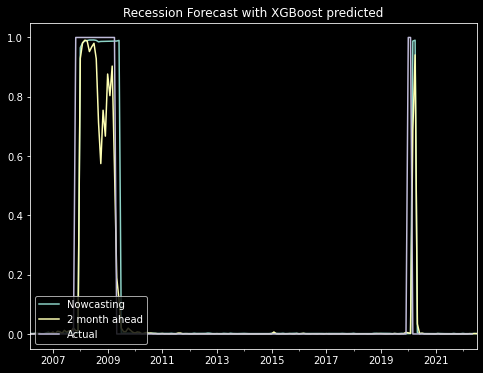

In [98]:
pred_df.plot(figsize=(8,6))
plt.title('Recession Forecast with XGBoost predicted')
plt.legend(loc='lower left')
plt.show()

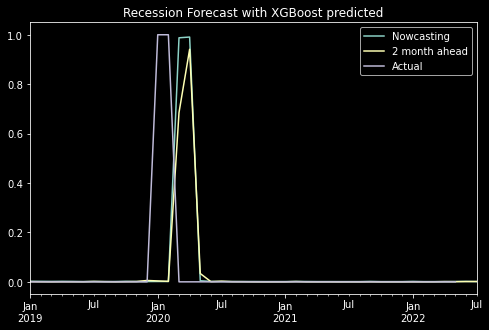

In [99]:

pred_df['2019':].plot(figsize=(8,5))
plt.title('Recession Forecast with XGBoost predicted')
plt.show()

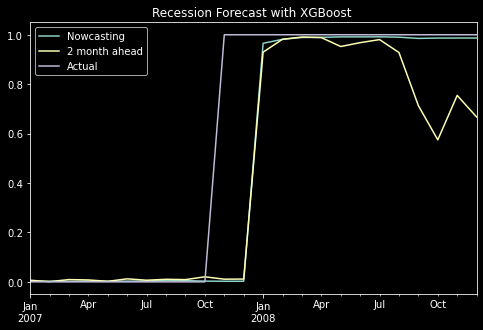

In [103]:
pred_df['2007':'2008'].plot(figsize=(8,5))
plt.title('Recession Forecast with XGBoost ')
plt.show()

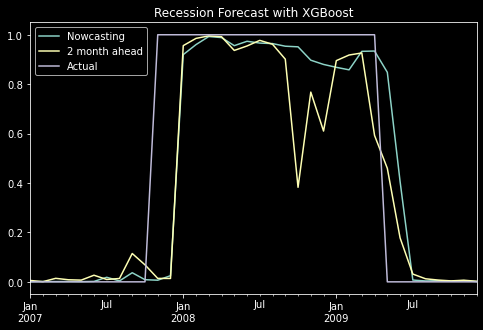

In [50]:
pred_df['2007':'2009'].plot(figsize=(8,5))
plt.title('Recession Forecast with XGBoost')
plt.show()